# Exercise 8.1: SIS model

An alternative to the SIR model, which we studied in one of the previous classes, is the [SIS model](https://de.wikipedia.org/wiki/SIS-Modell). In this model an individual does not become immune after recovering from an infection but becomes susceptible again. Thus, there are only two states: $S$ (susceptible) and $I$ (infectious). As before, there are also two hyperparameters: infection rate $\beta$ and recovery/death rate $\gamma$. Then the differential equations system describing the model are given by

$$\dfrac{dS}{dt} = -\beta IS + \gamma I, \quad \dfrac{dI}{dt} = \beta IS - \gamma I$$

We further assume that $I+S = 1$ and denote $\delta = \beta-\gamma$. Then the above system simplifies to the following single ODE:

$$\dfrac{dI}{dt} = (\delta - \beta I) I$$

**a)** Solve the ODE with the initial condition $I(0) = I_0$ (use `sympy.dsolve` function).

In [1]:
import sympy as sym

sym.init_printing()

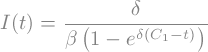

In [2]:
# write your code here

from sympy.abc import beta,gamma,t

delta = sym.Symbol('delta', positive=True)
I0 = sym.Symbol('I_0')

# to define the ODE in sympy, we need to define an unknown function I
I = sym.Function('I')

# define the equation
eq = sym.Eq(I(t).diff(t), (delta-beta*I(t))*I(t))

# solve the ODE using sym.dsolve
general_solution = sym.dsolve(eq,I(t))
 
# have a look at the solution
general_solution

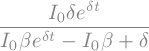

In [3]:
C = sym.Symbol('C1')

# to incorporate the initial condition, we can solve the ODE at t=0 for C1 constant
init_eq = general_solution.subs([(t,0), (I(0),I0)])
C_val = sym.solve(init_eq,C)

# then we insert the value of C1 to the general solution
ode_solution= general_solution.subs({C:C_val[0]})

# then the ODE solution for I(t) is the right hand side of the above expression
I = ode_solution.rhs.simplify()

I

# Alternatively, you can use argument ics of sym.dsolve to incorporate initial conditions (see the documentation)

**b)** Check that $1-I(t)$ satisfies the equation for $S$.

In [4]:
# write your code here

# We simply insert the expression for 1-I(t) into the equation for S(t),
# substract RHS from LHS and check whether we get zero

# Note that gamma = beta - delta
((1-I).diff(t)+((beta)*I*(1-I)-(beta-delta)*I)).simplify().is_zero

True

**c)** The number of infectious individuals will approach a stable point (equilibrium) over time. Determine this point.

In [5]:
# write your code here

# The limit depends on the sign of delta
# Therefore, we consider two cases: delta > 0 and delta <=0

print("The limit in case delta>0:")
display(sym.limit(I,t,sym.oo))

print("The limit in case delta<=0:")
display(sym.limit(I.subs({delta:-delta}),t,sym.oo))

The limit in case delta>0:


The limit in case delta<=0:


**d)** Plot $S, I$ for $\beta=0.4$ and $\gamma=0.04$ for $t\in[0,100]$ and initial conditions $S(0)=0.997$, $I(0)=0.03$. Compare with the plots for the SIR model from Exercise 6.1.

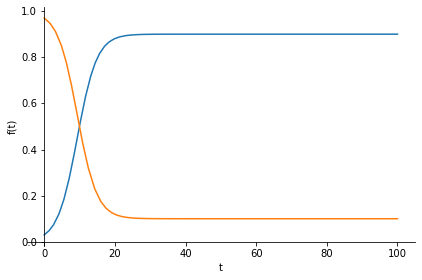

In [6]:
# write your code here
I_sol = ode_solution.rhs.subs({delta: 0.4-0.04, beta: 0.4, I0: 0.03})
S_sol = 1 - I_sol

sym.plot(I_sol, S_sol, (t,0,100))

# Exercise 8.2: Python scripts and modules

So far we have been using Jupyter notebook to run Python code. This option is great to examine and present your code interactively and to combine the code with plots, text, equations, etc. However, there are multiple situations (e.g. running code remotely or the exam 😉) where you need to use a more conventional way to write and run Python code, namely **Python scripts**. In this task, we learn how to use Python scripts. 

**What are Python scripts?** Python scripts are simply `*.py` files, which contain a set of Python commands .

**How to write/edit such files?** You can use a text editor (any standard editor on your computer would work but there are also editors made specifically for code, such as [Sublime](https://www.sublimetext.com)) or a Python IDE (e.g. [PyCharm](https://www.jetbrains.com/pycharm/) or [Spyder](https://www.spyder-ide.org)). 

**How to run a script?** To run a Python script, you can simply type `python script_name.py` in a terminal window. If you are using an IDE, there is typically also a "Run" button.

**How are scripts executed?** Python scripts are executed *linearly*, i.e. all the code simpy runs in the order in which the script contains it. This is in contrast with Jupyter notebooks, where you can have multiple code cells and run them in any order.

**a)** Create a script `primes.py`, which contains two functions from Exercise 3.1: the function that checks whether a number is a prime and the factorization function. Within your script, check whether numbers 17, 28, 131, 1573 are primes and factorize numbers 15793 and 15797. Print all the answers in a readable way.

**b)** As you know from the first exercise class, Python modules (libraries) are also simpy `*.py` files. Thus, you can turn your script into a library! Leave only the definitions of the two functions in your script. Then import your script as a module in this Jupyter notebook (`import primes`). Note that the script has to be in the same directory as the notebook for this to work. Try using the functions from your library inside the notebook.

**c)** There is a well-known Python idiom `if __name__ == "__main__"`, which *allows you to execute code when the file runs as a script, but not when it’s imported as a module*. You can read, for example, this [tutorial](https://realpython.com/if-name-main-python/) to understand this idiom better. Modify your `primes.py` script so that it simply contains the two functions from Exercise 3.1 when it is imported as a module but prints all the results required in part **a)** of this exercise when it is executed as a script. 

In [7]:
# write your code here

import primes

# We use the same test as in the primes.py file
# Note that in the notebook we need to call the functions from the primes namespace,
# i.e. as primes.is_prime() and primes.factorize()

tests = [17,28,131,1573]

for n in tests:
    if primes.is_prime(n):
        print(f"{n} is a prime.")
    else:
        print(f"{n} is not a prime.")

for n in [15793,15797]:
    print(f"Factorization of {n}: {primes.factorize(n)}")

17 is a prime.
28 is not a prime.
131 is a prime.
1573 is not a prime.
Factorization of 15793: {17: 1, 929: 1}
Factorization of 15797: {15797: 1}


# Exercise 8.3: Integration

In this task, we will practice integration in SymPy using the example of Gaussian distribution. The Gaussian density function is given by 

$$f(x) = \dfrac{1}{\sigma\sqrt{2\pi}}e^{-\dfrac{1}{2}\Bigl(\dfrac{x-\mu}{\sigma}\Bigr)^2}$$

**a)** Define the Gaussian density function as a SymPy expression. Note that you need to specify that $\sigma$ is positive in the above expression. Compute its definite integral with limits $(-\infty, \infty)$ (what should this integrals be equal to?).

In [8]:
# write your code here


x, mu = sym.symbols(('x', 'mu'))
sigma = sym.symbols('sigma', positive=True)

f = sym.exp(-sym.Rational(1)/sym.Rational(2)*((x-mu)/sigma)**2)/sigma/sym.sqrt(2*sym.pi)

# as expected, the integral of probability density is 1
sym.integrate(f, (x, -sym.oo, sym.oo))

**b)** Compute the expectation and the variance of the Gaussian distribution using integrals of $x\cdot f(x)$ and $x^2 \cdot f(x)$.

In [9]:
# write your code here

# the expectation is mu
E = sym.integrate(x*f, (x, -sym.oo, sym.oo)).simplify()

E

In [10]:
# the variance is sigma^2
Var = sym.integrate(x**2*f, (x, -sym.oo, sym.oo)).simplify() - E**2

Var

**c)** Compute the indefinite integral of $f(x)$. Notice that `sym.integrate` does not include an integration constant, therefore, the result only matches the Gaussian CDF $\Phi(x)$ up to a constant.

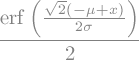

In [11]:
# write your code here

# indefinite integral without constant
sym.integrate(f, x)

**d)** Add a costant $C$ to the indefinite integral of $f(x)$ manually and use the equation $\int_{-\infty}^{\mu} f(x)dx = \dfrac{1}{2}$ to find the correct expression for $\Phi(x)$.

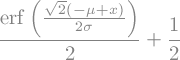

In [12]:
# write your code here

C = sym.Symbol('C')

Phi = C + sym.integrate(f, x)

# We define the equation at x=1/2 to find C
init_eq = sym.Eq(Phi.subs({x: mu}), sym.Rational(1)/sym.Rational(2))
C_val = sym.solve(init_eq, C)

# Then insert the C value in Phi to get the correct CDF expression
Phi.subs({C: C_val[0]})